<a href="https://colab.research.google.com/github/neural1977/deep_learning_lessons/blob/master/fashion_mnist_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First fashion mnist train image 9


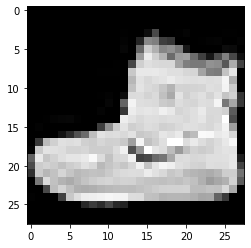

First fashion mnist test image 9


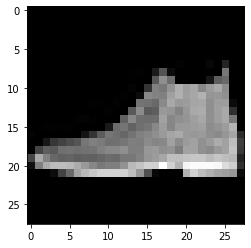

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 1s - loss: 0.6768 - acc: 0.7765 - val_loss: 0.4938 - val_acc: 0.8254

Epoch 00001: val_acc improved from -inf to 0.82542, saving model to fm.cnn
Epoch 2/100
 - 1s - loss: 0.4772 - acc: 0.8343 - val_loss: 0.4499 - val_acc: 0.8421

Epoch 00002: val_acc improved from 0.82542 to 0.84208, saving model to fm.cnn
Epoch 3/100
 - 1s - loss: 0.4348 - acc: 0.8501 - val_loss: 0.4202 - val_acc: 0.8554

Epoch 00003: val_acc improved from 0.84208 to 0.85542,

In [2]:
# general imports
import keras
import numpy as np
import pdb
import matplotlib.pyplot as plt
import random

# keras imports
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist, mnist
from keras.callbacks import ModelCheckpoint, EarlyStopping

input_dim = 784
default_callbacks = []
random.seed(42)

#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
#(X_train, y_train), (X_test, y_test) = mnist.load_data()


for k in range(1):
    # Show the first image from the training set
    plt.imshow(X_train[k], cmap = 'gray')
    plt.savefig("first_fashion_mnist_train_image_"+str(k)+".jpg")
    print("First fashion mnist train image", y_train[0])
    plt.show(block = False)
    plt.pause(3)
    plt.close()

for k in range(1):
    # Show the first image from the test set
    plt.imshow(X_test[k], cmap = 'gray')
    plt.savefig("first_fashion_mnist_test_image"+str(k)+".jpg")
    print("First fashion mnist test image", y_test[0])
    plt.show(block = False)
    plt.pause(3)
    plt.close()
    
X_train = X_train.reshape(60000,784)                # linearization of image data (which is 2-dimensional originally) because our model is mlp, so accept only linear data, unlike convolutional networks
X_test = X_test.reshape(10000,784)

# Normalization (testare come senza normalizzazione converge molto tardi a 95% rispetto alla normalizzazione)
X_train = X_train / 255.0
X_test = X_test / 255.0

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=input_dim))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
model.summary()

#pdb.set_trace()

# Convert labels to categorical one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

checkPoint=ModelCheckpoint("fm.cnn", save_weights_only=True, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
default_callbacks = default_callbacks+[checkPoint]

earlyStopping=EarlyStopping(monitor='val_loss', min_delta = 0.01, patience=5, verbose=0, mode='min') 
default_callbacks = default_callbacks+[earlyStopping]

# Train the model, iterating on the data in batches of 32 samples
model.fit(X_train, y_train, validation_split = 0.2, epochs=100, batch_size=128, 
                                        callbacks = default_callbacks, verbose = 2)
                                                                                
#model.save_weights("fm.cnn")

model.load_weights("fm.cnn")
                                        
score = model.evaluate(X_test, y_test, batch_size=5000)
print(score)